# Sentiment analysis for Echo Spot using Twitter

## Part 1 Data Gathering

In [1]:
%matplotlib inline

import os
import requests
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from textblob import TextBlob
from timeit import default_timer as timer
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### Gather

In order to authorise our app to access Twitter on our behalf, we need to use the OAuth interface (using tweepy).
Gathering tweets with words 'Echo' and 'Spot' for product 'Echo Spot'

In [2]:
consumer_key = 'E13M01ftcg4NaYjkJJQguKEF9'
consumer_secret = 'ff61gh7Bfzuf0lFPLjXN54RywBVIDQvF9p9aZpb7jaBybdV2Sh'
access_token = '197076175-o8vAHLIwqdZNx3NCdpZTrSK3lLsGdXUmjgFBKTda'
access_secret = '5moI9YXRiGnUjA7RO0RoIrD0enTOc0IEiyPQfRPLAGcoO'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)




Using the query words 'Echo' and 'Spot', query the Twitter API for each tweet's JSON data using Python's Tweepy library then storing each tweet's entire set of JSON data in a file called spot_json.txt file. Each tweet's JSON data is written to its own line.

In [27]:
def get_tweet_json():
    #This function gets the json associated with each tweet 
    
    start = timer() #starting timer to calculate execution time 
    data = []
    count = 0
    
    #getting only original tweets for Echo Spot 
    for tweet in tweepy.Cursor(api.search, q='%23EchoSpot OR \"Echo Spot\" OR \"EchoSpot\"'+ "-filter:retweets" , 
                               lang= 'en',tweet_mode='extended').items():
        
    #print tweet.created_at, tweet.text, tweet.user.id , tweet.user.followers_count
    
        try:
            
            data.append(tweet._json)
            count = count + 1
            print "Tweet %d found\n" %(count)
            if count >= 50000:
                break
        except:
            print 'Failed'
    
    if data: #if list is not empty
        with open('spot_json.txt', 'w') as outfile: #'w' mode to overwrite file if it already has content
            for item in data:
                json.dump(item, outfile)# when used the 'indent' parameter, the o/p file format wasn't json 
                #and wasn't recognized while loading data into dataframe
                outfile.write('\n')  
        
    end = timer() #stop timer
    print '%d Tweets processed ' %count
    print "Total time "
    print (end - start)  
    return None

get_tweet_json()



Tweet 1 found

Tweet 2 found

Tweet 3 found

Tweet 4 found

Tweet 5 found

Tweet 6 found

Tweet 7 found

Tweet 8 found

Tweet 9 found

Tweet 10 found

Tweet 11 found

Tweet 12 found

Tweet 13 found

Tweet 14 found

Tweet 15 found

Tweet 16 found

Tweet 17 found

Tweet 18 found

Tweet 19 found

Tweet 20 found

Tweet 21 found

Tweet 22 found

Tweet 23 found

Tweet 24 found

Tweet 25 found

Tweet 26 found

Tweet 27 found

Tweet 28 found

Tweet 29 found

Tweet 30 found

Tweet 31 found

Tweet 32 found

Tweet 33 found

Tweet 34 found

Tweet 35 found

Tweet 36 found

Tweet 37 found

Tweet 38 found

Tweet 39 found

Tweet 40 found

Tweet 41 found

Tweet 42 found

Tweet 43 found

Tweet 44 found

Tweet 45 found

Tweet 46 found

Tweet 47 found

Tweet 48 found

Tweet 49 found

Tweet 50 found

Tweet 51 found

Tweet 52 found

Tweet 53 found

Tweet 54 found

Tweet 55 found

Tweet 56 found

Tweet 57 found

Tweet 58 found

Tweet 59 found

Tweet 60 found

Tweet 61 found

Tweet 62 found

Tweet 63 found

T

Read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
with open('spot_json.txt') as f:
    df_json = pd.DataFrame(json.loads(line) for line in f)

df_json.to_csv('spot_json.csv', sep=',', encoding='utf-8', index = False)


In [3]:
list(df_json)


[u'contributors',
 u'coordinates',
 u'created_at',
 u'display_text_range',
 u'entities',
 u'extended_entities',
 u'favorite_count',
 u'favorited',
 u'full_text',
 u'geo',
 u'id',
 u'id_str',
 u'in_reply_to_screen_name',
 u'in_reply_to_status_id',
 u'in_reply_to_status_id_str',
 u'in_reply_to_user_id',
 u'in_reply_to_user_id_str',
 u'is_quote_status',
 u'lang',
 u'metadata',
 u'place',
 u'possibly_sensitive',
 u'quoted_status',
 u'quoted_status_id',
 u'quoted_status_id_str',
 u'retweet_count',
 u'retweeted',
 u'source',
 u'truncated',
 u'user']

In [4]:
df_json['full_text'].head(5)

0    Building for Echo Show and Echo Spot: VUI &amp...
1    Enter to win an @Amazon #EchoSpot from @GeekWi...
2    Enter to win an @Amazon #EchoSpot from @GeekWi...
3    How to Disable the Camera on the Echo Spot htt...
4    #FreeKindleBook [Education &amp; Teaching][Fre...
Name: full_text, dtype: object

In [5]:
df_json.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user
0,None,None,Sun Jan 14 18:37:48 +0000 2018,"[0, 104]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,Building for Echo Show and Echo Spot: VUI &amp...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""https://panel.socialpilot.co/"" rel=""n...",False,"{u'follow_request_sent': False, u'has_extended..."
1,None,None,Sun Jan 14 17:40:18 +0000 2018,"[0, 136]","{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,Enter to win an @Amazon #EchoSpot from @GeekWi...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{u'follow_request_sent': False, u'has_extended..."
2,None,None,Sun Jan 14 16:28:14 +0000 2018,"[0, 136]","{u'symbols': [], u'user_mentions': [{u'indices...",NaN,0,False,Enter to win an @Amazon #EchoSpot from @GeekWi...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{u'follow_request_sent': False, u'has_extended..."
3,None,None,Sun Jan 14 15:15:32 +0000 2018,"[0, 66]","{u'symbols': [], u'user_mentions': [], u'hasht...",{u'media': [{u'expanded_url': u'https://twitte...,0,False,How to Disable the Camera on the Echo Spot htt...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://publicize.wp.com/"" rel=""nofoll...",False,"{u'follow_request_sent': False, u'has_extended..."
4,None,None,Sun Jan 14 14:36:17 +0000 2018,"[0, 271]","{u'symbols': [], u'user_mentions': [], u'hasht...",NaN,0,False,#FreeKindleBook [Education &amp; Teaching][Fre...,None,...,None,False,NaN,NaN,NaN,0,False,"<a href=""http://free-kindle-books.deha-solutio...",False,"{u'follow_request_sent': False, u'has_extended..."


In [6]:
df_tweets = df_json.loc[:, ['id','retweet_count','favorite_count','full_text']]

### Assess

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 4 columns):
id                291 non-null int64
retweet_count     291 non-null int64
favorite_count    291 non-null int64
full_text         291 non-null object
dtypes: int64(3), object(1)
memory usage: 9.2+ KB


In [8]:
s = df_tweets.sample(30)

df_tweets.to_csv('spot_full.csv', sep = ',', encoding = 'utf-8', index = False)
s

,id,retweet_count,favorite_count,full_text
273,949166542931013632,1,0,"#EchoSpot music lyrics, weather forecasts, to-..."
82,951483504738689024,0,0,Building for Echo Show and Echo Spot: VUI &amp...
34,952021579520618497,0,8,Echo Spot is now my favorite toy. I ask it to...
282,949090732203298817,0,0,"Amazon Echo Spot review: The alarm clock, rein..."
192,950248457327071232,0,0,How to Change #AmazonEchoSpot #WatchFaces (Gui...
135,950770171773407232,0,0,@SalihSarikaya Voice assistant integration is ...
197,950187198434824192,7,21,Don’t forget to enter our @Amazon #EchoSpot #g...
133,950796930212352001,0,1,Congratulations to the winner of the Echo Spot...
161,950470898527555584,2,4,"Alexa, start The Gorilla Channel https://t.co/..."
231,949579587935199233,1,0,"#EchoSpot music lyrics, weather forecasts, to-..."


# Clean Tweets

Remove hyperlinks, user mentions and special characters from each tweet.

In [12]:
bkup_copy_df_tweets = df_tweets
df_tweets.head(5)


,id,retweet_count,favorite_count,full_text
0,952610719018766337,0,0,Building for Echo Show and Echo Spot: VUI &amp...
1,952596248367980544,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...
2,952578109492088832,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...
3,952559816152674306,0,0,How to Disable the Camera on the Echo Spot htt...
4,952549940068102144,0,0,#FreeKindleBook [Education &amp; Teaching][Fre...


In [15]:
def clean_tweet_text(df):
    #remove hyperlinks, user mentions and special characters
    for i, row in df.iterrows():
        t = row['full_text']        
        t = re.sub('(\w+:\/\/\S+)', " ",t)# remove hyperlinks
        t = re.sub("(@[A-Za-z0-9]+)", " ",t)#remove user mentions
        t = re.sub("#","", t) #remove hash
        t = re.sub('&amp',' ',t) #remove & which is written as &amp
        t = re.sub('[^0-9a-zA-Z \t]', " ",t) #remove special characters
        t = re.sub('\s+',' ',t).strip() #remove unwanted whitespaces
        
        df.loc[i,'text'] = t
    return df

df_clean_tweets = clean_tweet_text(df_tweets)

In [16]:
df_clean_tweets.head(5)

,id,retweet_count,favorite_count,full_text,text
0,952610719018766337,0,0,Building for Echo Show and Echo Spot: VUI &amp...,Building for Echo Show and Echo Spot VUI GUI B...
1,952596248367980544,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...,Enter to win an EchoSpot from sweeps giveaways
2,952578109492088832,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...,Enter to win an EchoSpot from sweeps giveaways
3,952559816152674306,0,0,How to Disable the Camera on the Echo Spot htt...,How to Disable the Camera on the Echo Spot
4,952549940068102144,0,0,#FreeKindleBook [Education &amp; Teaching][Fre...,FreeKindleBook Education Teaching Free Amazon ...


# Sentiment Analysis

Using TextBlob to analyze tweets' sentiment

In [17]:
def analyze_sentiment(df):
    df_out = pd.DataFrame(columns = ['text','polarity','subjectivity'])
    for i, row in df.iterrows():
        text = row['text']

        #creating aTextBlob object 
        analyze = TextBlob(text) 
        
        #populate output dataframe 
        df_out = df_out.append({'text': text, 
                       'polarity': analyze.sentiment.polarity,
                       'subjectivity': analyze.sentiment.subjectivity},
                      ignore_index = True) 
    return df_out

df_sentiments = analyze_sentiment(df_clean_tweets)

In [18]:
df_sentiments.to_csv('sentiments.csv', sep=',', encoding='utf-8', index = False)

### Further Clean-up

As per the sentiment analysis visual evaluation of some records, the color 'Black' for Echo Spot when mentioned in tweets causes polarity to become negative. Hence, replacing 'Black' with 'RGB000' and re-doing the above whole process.

In [20]:
def replace_word_black(df):
    for i, row in df.iterrows():
        t = row['text'].lower()
        if t.find('black') != -1: #-1 means not found
            #print t
            r = re.sub('[b|B]lack','RGB000', row['text']).strip()
            #print r
            df.loc[i,'text'] = r

    return df

df_clean_tweets_nonBL  = replace_word_black(df_clean_tweets)


In [24]:
df_clean_tweets_nonBL.sample(5)

,id,retweet_count,favorite_count,full_text,text
24,952165429312675840,0,0,Enter to win an @Amazon #EchoSpot from @GeekWi...,Enter to win an EchoSpot from sweeps giveaways
30,952088202059317249,0,0,Amazon Echo Spot\n\nbuy it 👉 https://t.co/4wd...,Amazon Echo Spot buy it
26,952126833461485568,0,0,Amazon’s Echo Spot Is a Good-as-Hell Alarm Clo...,Amazon s Echo Spot Is a Good as Hell Alarm Clock
117,950926745846337537,0,0,Buy Cheap #4: Echo Spot - Black https://t.co/S...,Buy Cheap 4 Echo Spot RGB000
9,952487622454267904,0,0,How to Change the Clock Face on the Echo Spot ...,How to Change the Clock Face on the Echo Spot


Re-running sentiment analysis code on new cleaned tweets devoid of the word 'Black' (df_clean_tweets_nonBL)

In [25]:
df_sentiments_improved = analyze_sentiment(df_clean_tweets_nonBL)
df_sentiments_improved  

,text,polarity,subjectivity
0,Building for Echo Show and Echo Spot VUI GUI B...,1.000000,0.300000
1,Enter to win an EchoSpot from sweeps giveaways,0.800000,0.400000
2,Enter to win an EchoSpot from sweeps giveaways,0.800000,0.400000
3,How to Disable the Camera on the Echo Spot,0.000000,0.000000
4,FreeKindleBook Education Teaching Free Amazon ...,0.280000,0.580000
5,AmzCOM free Kindle eBook Amazon Echo Dot The C...,0.280000,0.580000
6,Just saw this on Amazon Echo Spot RGB000 by Am...,0.000000,0.000000
7,The Echo Spot is my new favorite Alexa device,0.318182,0.727273
8,6 reasons why the Amazon Echo Spot is the perf...,1.000000,1.000000
9,How to Change the Clock Face on the Echo Spot,0.000000,0.000000


We can see from above results that replacing the word 'Black' with RGB000 (to avoid loss of information), we were able to change the polarity scores to neutral (score changed from -0.1667 to 0)

In [26]:
df_sentiments_improved.describe()

,polarity,subjectivity
count,291.000000,291.000000
mean,0.243943,0.322332
std,0.347114,0.311711
min,-0.800000,0.000000
25%,0.000000,0.000000
50%,0.104167,0.321429
75%,0.403571,0.550758
max,1.000000,1.000000


The minimum value for polarity is -0.8. (After checking we can see that there is no negative sentiment in the tweet!)

In [27]:
df_sentiments_improved.loc[(df_sentiments_improved.polarity == -0.8)]

,text,polarity,subjectivity
262,Echo Show Stand Echo Spot Holder 360 Rotating ...,-0.8,1.0


#### Clean-up needed
As the above tweet is a marketing tweet and causing a dip in avg polarity let's manually assign polarity = 0 for this this tweet (index 262, Echo Show Stand Echo Spot Holder 360 Rotating ...	)

In [29]:
df_sentiments_improved.loc[(df_sentiments_improved.polarity == -0.8),'polarity'] = 0

#### Test

In [31]:
df_sentiments_improved.iloc[262]

text            Echo Show Stand Echo Spot Holder 360 Rotating ...
polarity                                                        0
subjectivity                                                    1
Name: 262, dtype: object


In [33]:
df_sentiments_improved.to_csv('sentiments_improved.csv', sep = ',', encoding='utf-8', index = False)

## Part 3 Visualize Data

#### Distribution of polarity
First lets the polarity distribution

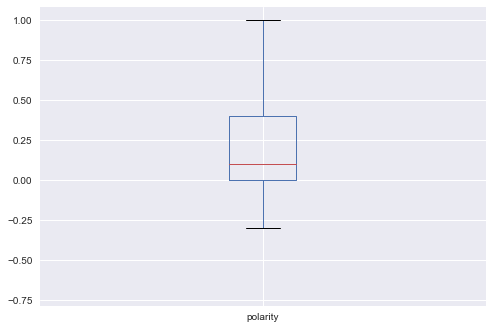

In [39]:
df_sentiments_improved['polarity'].plot(kind = 'box') #plot function is for pandas series

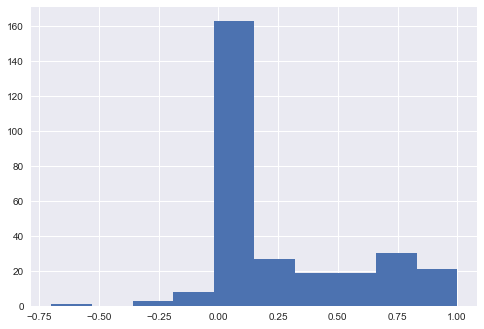

In [32]:
df_sentiments_improved['polarity'].hist()

As can be seen from the plot #1 above, 
- Most of the tweets have positive sentiment (polarity > 0). However a quick glance through the tweets shows us that most of the positive tweets are actually marketing ads posted for the device.
- The false negative posts triggered by the word 'black' have been fixed and now show neutral polarity.

Overall this is a good start considering the lack of tweets as Echo Spot is still a new product (not even a month old yet).

## NEXT STEPS

- As more tweets become available the results would be more credible.
- Will have to find a way to exclude marketing tweets from my analysis.
